<a href="https://colab.research.google.com/github/ayan-2025/IE-506-Project/blob/main/Copy_of_Learning_to_Learn_Model_Regression_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits

digits = load_digits()
digits

Mounted at /content/drive/


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
X = digits.data
y = digits.target


Now we are making Model pair set

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


model_X = []
model_y = []
samples_for_w = np.zeros((1,129))

for i in range(0,8):

   negative_examples = digits.data[digits.target != i]
   num_negative_examples = 100
   negative_examples_subsampled = resample(negative_examples, n_samples=num_negative_examples, random_state=42)

   subsampled_X = np.vstack((digits.data[digits.target == i], negative_examples_subsampled))
   subsampled_y = np.hstack((np.ones(np.count_nonzero(digits.target == i)), np.zeros(num_negative_examples)))

   random_state_C_map = {0: 0.01, 42: 0.1, 123: 1, 130: 10, 140: 100}

   train_X, test_X, train_y, test_y = split(subsampled_X, subsampled_y, test_size=0.1, shuffle=True, random_state=0)
   param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
   svm = SVC(kernel='linear')
   grid_search = GridSearchCV(svm, param_grid, cv=5)
   grid_search.fit(train_X, train_y)
   C = grid_search.best_params_['C']
   svm = SVC(kernel='linear', C=C)
   svm.fit(train_X, train_y)
   w_1 = svm.coef_

   print("For class: ", i)
   print("Best parameters:", grid_search.best_params_)
   print("Accuracy:", grid_search.score(test_X, test_y))
   print("w_1 value: ", w_1)

   #Here we are associating w_1 to sample data which will help us during hinge loss calculation in myloss definition
   new_shape = (len(subsampled_X), 64)
   a = np.tile(w_1, (new_shape[0], 1))
   subsampled_y = np.reshape(subsampled_y, (subsampled_y.shape[0], 1))
   b = np.concatenate((subsampled_X, a, subsampled_y), axis=1)
   samples_for_w = np.concatenate((samples_for_w, b), axis=0)
   #Now split it
   #X_for_w, w, y_for_w = np.split(samples_for_w, [64, 128], axis=1)

   for random_state in random_state_C_map.keys():
     train_small_X, test_small_X, train_small_y, test_small_y = split(train_X, train_y, test_size=0.3, shuffle=True, random_state=random_state) #check point
     C = random_state_C_map[random_state]
     svm = SVC(kernel='linear', C=C)
     svm.fit(test_small_X, test_small_y) #check point
     w_0 = svm.coef_
     model_X.append(w_0)
     model_y.append(w_1)
     y_pred = svm.predict(train_small_X)
     acc = accuracy_score(train_small_y, y_pred)
     print('Accuracy:', acc)


For class:  0
Best parameters: {'C': 0.01}
Accuracy: 0.9642857142857143
w_1 value:  [[ 0.         -0.00376754  0.00164488 -0.00365262  0.01999387 -0.03035701
  -0.02004712 -0.00257044  0.         -0.00249962  0.01324345  0.00494497
   0.01498534  0.01265705 -0.01536988 -0.00428407  0.          0.00727835
   0.00868332 -0.00857294 -0.05415125  0.02344857 -0.00488783  0.
   0.         -0.00225928  0.0026194  -0.01762128 -0.0681159   0.01533101
   0.02252755  0.          0.          0.00436789  0.02711768 -0.0356569
  -0.09287035  0.01174365  0.02025057  0.          0.          0.00204157
   0.04872    -0.02196616 -0.00621981 -0.00360667  0.00123086  0.
   0.         -0.00810443  0.0226691  -0.00130789  0.01430254 -0.01273565
  -0.01075727  0.          0.         -0.00024006 -0.00407521 -0.00536095
   0.00668131 -0.02022862 -0.02318745 -0.0084211 ]]
Accuracy: 0.9771428571428571
Accuracy: 0.9885714285714285
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9942857142857143
For class:  1
Best paramet

Models learned from small-sample set for all classes (1 to 7)

In [ ]:
model_X = np.array(model_X)
model_X = model_X.reshape(40,64)

Models learned from large-sample set for all classes (1 to 7)

In [ ]:
model_y = np.array(model_y)
model_y = model_y.reshape(40,64)

In [ ]:
X_train, X_test, y_train, y_test = split(model_X, model_y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


We are changing the label 0 to -1 for our data fitting calculation (i.e. for hinge loss calculation purpose)

In [ ]:
subsampled_y = np.where(subsampled_y==0, -1, subsampled_y)

Now we are defining our final loss function i.e. myloss

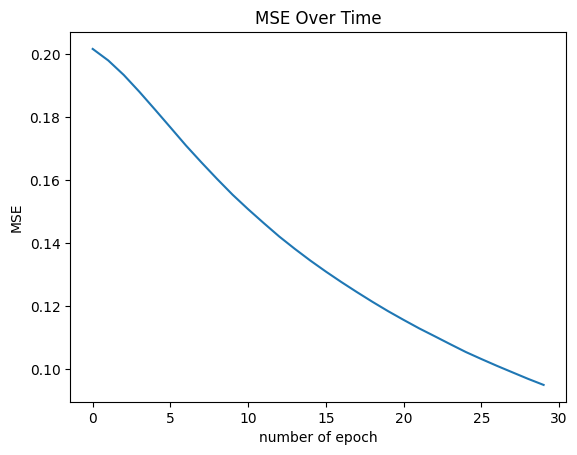

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from sklearn.metrics import mean_squared_error

# Define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
# Compile the model
model.compile(loss='mse', optimizer=sgd, metrics=['mae', 'mse'])
num_epochs = 30
# k-fold cross validation

mse_values = []

for i in range(num_epochs):
  # Fit the model
  history = model.fit(X_train, y_train, epochs=1, batch_size=20, verbose=0)
  y_pred = model.predict(X_train, verbose=0)
  mse = mean_squared_error(y_train, y_pred)
  mse_values.append(mse)

plt.plot(range(num_epochs), mse_values)
plt.xlabel('number of epoch')
plt.ylabel('MSE')
plt.title('MSE Over Time')
plt.show()


Now applying test set from model pairs

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


1/1 [==============================] - 0s 29ms/step
MSE: 0.09583770825963273
RMSE: 0.30957665974622944
MAE: 0.23289807290057274
R²: -48124.10056012246


Now we taking class label 9 as our Novel category

In [ ]:
negative_examples_test = digits.data[digits.target != 9]
num_negative_examples_test = 100
negative_examples_subsampled = resample(negative_examples, n_samples=num_negative_examples, random_state=42)

subsampled_X_test = np.vstack((digits.data[digits.target == 9], negative_examples_subsampled))
subsampled_y_test = np.hstack((np.ones(np.count_nonzero(digits.target == 9)), np.zeros(num_negative_examples)))

sample_nmuber = 40
#taking indices for some randomly chosen samples from class 9
idx = np.random.choice(subsampled_X_test.shape[0], sample_nmuber, replace=False)
y = subsampled_y_test[idx]
X_test = subsampled_X_test[idx]

model_X_9 = []
svm.fit(subsampled_X_test[idx], subsampled_y_test[idx]) #check point
w_0 = svm.coef_
model_X_9.append(w_0)
model_X_9 = np.array(model_X_9)
model_X_9 = model_X_9.reshape(1,64)


In [ ]:
y_pred = model.predict(model_X_9, verbose=0)
y_pred

array([[ 0.23766881, -0.00035942, -0.1198969 ,  0.0416749 ,  0.00777981,
        -0.08836327, -0.01199505, -0.0198073 , -0.00982898, -0.11229623,
        -0.20308238,  0.06865096,  0.03731804, -0.14029145, -0.00802674,
         0.10002851, -0.18916525,  0.01375209, -0.11111052, -0.21123318,
         0.0488158 ,  0.0417874 , -0.07274736, -0.26586175,  0.18009858,
        -0.01136265,  0.01579745,  0.0390618 , -0.08597258, -0.02507419,
         0.13728692,  0.05511844,  0.08562906,  0.04320615,  0.04507777,
        -0.00535204,  0.0889722 ,  0.02221539,  0.28198585, -0.0615772 ,
         0.05043445, -0.19730397,  0.15713872, -0.07230644,  0.2143389 ,
         0.02277103, -0.15202582,  0.1667897 ,  0.08010168, -0.01141562,
        -0.16814466,  0.10540062,  0.14752299, -0.00526822,  0.04766574,
         0.16209231,  0.14040935,  0.08736528, -0.12439766, -0.03590206,
         0.00846327, -0.27013573,  0.00487159,  0.02660709]],
      dtype=float32)

In [ ]:
y = np.where(y==0, -1, y)
y

array([-1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1.])

In [ ]:
def gradient_descent( grad, w_init, learning_rate=0.001, max_iterations=1000, tolerance=1e-6):
    w = np.copy(w_init)
    for i in range(max_iterations):
        g = grad(w)
        if np.linalg.norm(g) < tolerance:
            break
        w -= learning_rate * g
    return w

def grad(w):
    s = 0
    for i in range(sample_nmuber):
       wTx = np.dot(w, X_test[i])
       if 1 - y[i]*wTx > 0:
          s -= y[i]*X_test[i]
    return w - y_pred + 0.01*s


In [ ]:
w_init = y_pred
w_opt = gradient_descent(grad, w_init)
print(w_opt)

[[ 0.23766881  0.00281361  0.00293661  0.10493966 -0.01269371 -0.0728367
  -0.03801744 -0.0198073  -0.00982898 -0.1169004  -0.07909234 -0.07533632
   0.00255334 -0.02139885 -0.04746188  0.10002851 -0.1893907   0.04490961
  -0.08609226 -0.1954503   0.07894812  0.17552334 -0.09090615 -0.26586175
   0.18009858 -0.00192999  0.05433025  0.14149186 -0.03796142  0.04222307
   0.11849642  0.05511844  0.08562906 -0.02099425 -0.03578124  0.00458363
  -0.02035363  0.04529136  0.25054938 -0.0615772   0.05043445 -0.23095407
   0.00951335 -0.2278967   0.05231057  0.01695093 -0.10044333  0.15041792
   0.08010168  0.01116685 -0.09350382  0.03090961 -0.04995297  0.00433766
   0.09728774  0.15290947  0.14040935  0.08743966 -0.04618277  0.04268485
   0.01950392 -0.16529593  0.0123308   0.01086535]]


In [ ]:
from sklearn.metrics import accuracy_score
w_opt_T = w_opt.reshape(64,1)
scores = np.dot(subsampled_X_test, w_opt_T)
y_pred_test = np.sign(scores)
acc = accuracy_score(subsampled_y_test, y_pred_test)
print("Accuracy for our optimal w: ", acc)

Accuracy for our optimal w:  0.8178571428571428
